In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [2]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized


2023-04-09 22:39:57.394733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-09 22:39:57.428985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-09 22:39:57.429188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-09 22:39:57.430425: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

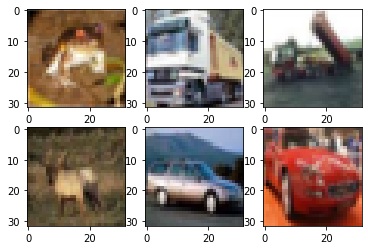

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000,)


In [3]:
cifar= tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


# train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)
# test_images=test_images/255


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  ### Pretrained Model







In [4]:
from tensorflow.keras.models import Sequential
model = ResNet50(weights='imagenet')

# model = Sequential()

# model.add(tf.keras.applications.ResNet50(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(32,32,3),
#     pooling=None,
#     classes=1000
#     ))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# epochs=5
# history = model.fit(
#   train_images,
#   train_labels,
#   epochs=epochs,
#   batch_size=64
# )

### Predicting 

1/1 [==============================] - 0s 19ms/step
Top 3 Values: [('n01688243', 'frilled_lizard', 0.5992483), ('n03884397', 'panpipe', 0.069739744), ('n07248320', 'book_jacket', 0.054037165)]
Predicted : frilled_lizard
Actual    : frog


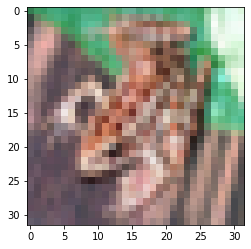

In [13]:
cnt= random.randint(0,100)
img = test_images[cnt]
img1 = tf.image.resize(img, (224,224))

x = image.img_to_array(img1)
x1=x.copy()  # this is done to avoid error "X is read only"
x1 = np.expand_dims(x1, axis=0)

x1 = preprocess_input(x1)


preds = model.predict(x1)
print('Top 3 Values:', decode_predictions(preds, top=3)[0])
print('Predicted :', decode_predictions(preds, top=3)[0][0][1])
print('Actual    :',classes[test_labels[cnt]])
plt.imshow(img,cmap='gray')

